<a href="https://colab.research.google.com/github/sanjaykumar545/RoadSafe-Analytics/blob/main/milestone1/week2/day10/encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
dc={
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Houston', 'Los Angeles', 'Boston', 'Boston', 'Chicago'],
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy'],
    'Severity': [3, 2, 3, 1, 4, 2, 3, 3, 1],
    'Accidents': [100, 150, 100, 80, 90, 150, 60, 60, 80]
}
ds=pd.DataFrame(dc)
print(ds.head(8))

          City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
2     New York   Sunny         3        100
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
5  Los Angeles   Rainy         2        150
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60


In [6]:
#removing duplicates
ds_ndup=ds.drop_duplicates()
print("After removing dup : \n",ds_ndup)

After removing dup : 
           City Weather  Severity  Accidents
0     New York   Sunny         3        100
1  Los Angeles   Rainy         2        150
3      Chicago  Cloudy         1         80
4      Houston   Sunny         4         90
6       Boston   Rainy         3         60
7       Boston   Sunny         3         60


In [8]:
# Label Encoding with pandas category dtype
ds_ndup['City_Encoded'] = ds_ndup['City'].astype('category').cat.codes
print("\nLabel Encoded 'City' column:")
print(ds_ndup[['City', 'City_Encoded']])


Label Encoded 'City' column:
          City  City_Encoded
0     New York             4
1  Los Angeles             3
3      Chicago             1
4      Houston             2
6       Boston             0
7       Boston             0


/tmp/ipython-input-871311361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_ndup['City_Encoded'] = ds_ndup['City'].astype('category').cat.codes


In [9]:
# One-Hot Encoding using pandas get_dummies
ds_onehot = pd.get_dummies(ds_ndup, columns=['Weather'])
print("\nOne-Hot Encoded 'Weather' column:")
print(ds_onehot.head())


One-Hot Encoded 'Weather' column:
          City  Severity  Accidents  City_Encoded  Weather_Cloudy  \
0     New York         3        100             4           False   
1  Los Angeles         2        150             3           False   
3      Chicago         1         80             1            True   
4      Houston         4         90             2           False   
6       Boston         3         60             0           False   

   Weather_Rainy  Weather_Sunny  
0          False           True  
1           True          False  
3          False          False  
4          False           True  
6           True          False  



Detected outliers:
          City Weather  Severity  Accidents  City_Encoded
1  Los Angeles   Rainy         2        150             3

Dataset after removing outliers:
       City Weather  Severity  Accidents  City_Encoded
0  New York   Sunny         3        100             4
3   Chicago  Cloudy         1         80             1
4   Houston   Sunny         4         90             2
6    Boston   Rainy         3         60             0
7    Boston   Sunny         3         60             0

Dataset after capping outliers:
          City Weather  Severity  Accidents  City_Encoded
0     New York   Sunny         3     100.00             4
1  Los Angeles   Rainy         2     146.25             3
3      Chicago  Cloudy         1      80.00             1
4      Houston   Sunny         4      90.00             2
6       Boston   Rainy         3      60.00             0
7       Boston   Sunny         3      60.00             0


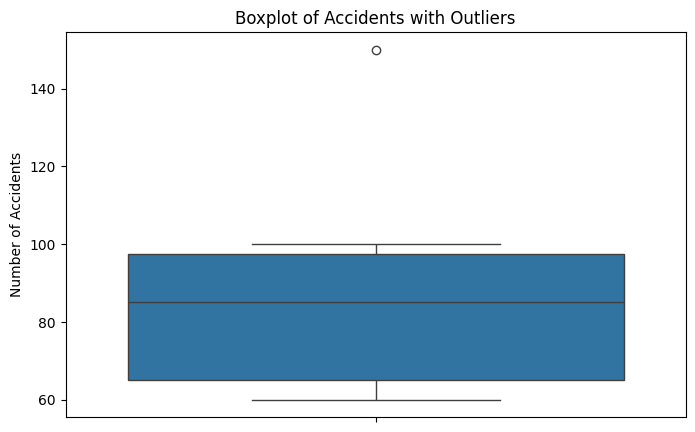

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Detecting and handling outliers in 'Accidents' column using IQR method
Q1 = ds_ndup['Accidents'].quantile(0.25)
Q3 = ds_ndup['Accidents'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ds_ndup[(ds_ndup['Accidents'] < lower_bound) | (ds_ndup['Accidents'] > upper_bound)]
print("\nDetected outliers:")
print(outliers)

# Option 1: Remove outliers
ds_no_outliers = ds_ndup[(ds_ndup['Accidents'] >= lower_bound) & (ds_ndup['Accidents'] <= upper_bound)]
print("\nDataset after removing outliers:")
print(ds_no_outliers)

# Option 2: Cap outliers (Winsorizing)
ds_capped = ds_ndup.copy()
ds_capped['Accidents'] = np.where(ds_capped['Accidents'] > upper_bound, upper_bound,
                                  np.where(ds_capped['Accidents'] < lower_bound, lower_bound, ds_capped['Accidents']))
print("\nDataset after capping outliers:")
print(ds_capped)

# Visualization using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y='Accidents', data=ds_ndup)
plt.title('Boxplot of Accidents with Outliers')
plt.ylabel('Number of Accidents')
plt.show()


